Exercicis d'algoritmes de Classificació.

- Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

- Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.


- Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


- Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Este ejercicio no lo tengo claro. Porque para hacer el modelo ya uno el train/test. Esto quiere decir que tengo que ahora usar el cross validation. es decir que a la final uso los dos pero como el enunciado dice "o". debería decir use los dos. 


- Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

## DESARROLLO

En cada modelo he desarrollado los ejercicios mencionado anteriormente 

Segun la base de datos hay tres clases de vino para lo cual contamos con 13 atributos 

 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline  

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
import numpy as np

In [4]:
wine = pd.read_csv( r"C:\\DataScience\\string7\\wineData.csv",sep=",",header=None)

In [5]:
wine.shape

(178, 14)

In [6]:
wine.columns=["Class", "Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium", "phenols", "Flavanoids", "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "diluted", "Proline"]

In [7]:
wine.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
wine["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

## MODELO 1: DECISION TREE

In [22]:
Y=wine.Class
X=wine[["Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium", "phenols", "Flavanoids", "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "diluted", "Proline"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating Model


In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


In [26]:
score = clf.score(X_test, y_test)
print(score)

0.9814814814814815


In [27]:
y_pred

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1], dtype=int64)

In [28]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

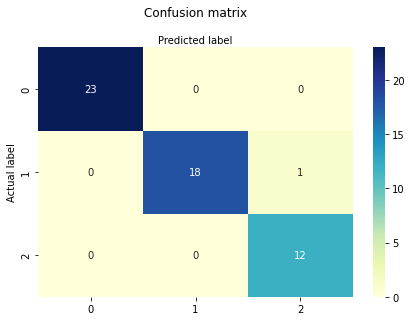

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [30]:
from sklearn.metrics import classification_report
target_names = ['Class',"Class 2","Class 3"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Class       1.00      1.00      1.00        23
     Class 2       1.00      0.95      0.97        19
     Class 3       0.92      1.00      0.96        12

    accuracy                           0.98        54
   macro avg       0.97      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### cambio de parametros modelo 1

In [31]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0,  0],
       [ 2, 17,  0],
       [ 0,  0, 12]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
target_names = ['Class',"Class 2","Class 3"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Class       0.92      1.00      0.96        23
     Class 2       1.00      0.89      0.94        19
     Class 3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



### K Cross Validation

In [37]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
clf = DecisionTreeClassifier(random_state=1)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [1.         0.83333333 0.88888889 0.66666667 0.77777778 1.
 0.94444444 0.72222222 0.88235294 0.88235294]
Average CV Score:  0.8598039215686274
Number of CV Scores used in Average:  10


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


con el CV el modelo es menos eficiente 

### Ingenieria de datos 

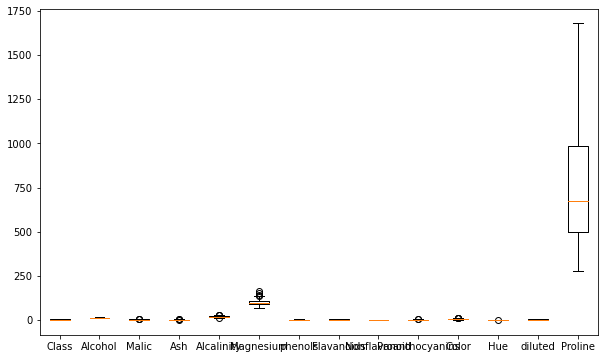

In [44]:
fig, ax = plt.subplots()
ax.boxplot(wine,labels=wine.columns)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

In [45]:
from scipy.stats import shapiro

for i in wine.columns:
    stat, p = shapiro(wine[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(i,'Probably Gaussian')
    else:
        print(i,'Probably not Gaussian')

stat=0.804, p=0.000
Class Probably not Gaussian
stat=0.982, p=0.020
Alcohol Probably not Gaussian
stat=0.889, p=0.000
Malic Probably not Gaussian
stat=0.984, p=0.039
Ash Probably not Gaussian
stat=0.990, p=0.264
Alcalinity Probably Gaussian
stat=0.938, p=0.000
Magnesium Probably not Gaussian
stat=0.977, p=0.004
phenols Probably not Gaussian
stat=0.955, p=0.000
Flavanoids Probably not Gaussian
stat=0.963, p=0.000
Nonflavanoid Probably not Gaussian
stat=0.981, p=0.014
Proanthocyanins Probably not Gaussian
stat=0.940, p=0.000
Color Probably not Gaussian
stat=0.981, p=0.017
Hue Probably not Gaussian
stat=0.945, p=0.000
diluted Probably not Gaussian
stat=0.931, p=0.000
Proline Probably not Gaussian


In [46]:
from sklearn import preprocessing

In [47]:
scaler = preprocessing.RobustScaler()

In [48]:
norm=scaler.fit_transform(X)

In [49]:
X_norm=pd.DataFrame(norm, columns=X.columns,index=wine.index)

In [50]:
X_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.501901,2.557432,0.258993,0.232558,-0.157895,-0.638298,-0.913174,1.074627,-0.707143,1.010067,-0.962963,-0.843813,0.137255
174,0.266160,1.381757,0.345324,0.813953,0.210526,-0.524823,-0.829341,0.537313,-0.207143,0.875839,-0.785185,-0.989858,0.157895
175,0.167300,1.631757,-0.287770,0.116279,1.157895,-0.723404,-0.865269,0.537313,-0.292857,1.848993,-1.111111,-0.989858,0.333333
176,0.091255,0.489865,0.028777,0.116279,1.157895,-0.666667,-0.871257,1.134328,-0.135714,1.546980,-1.081481,-0.941176,0.343653


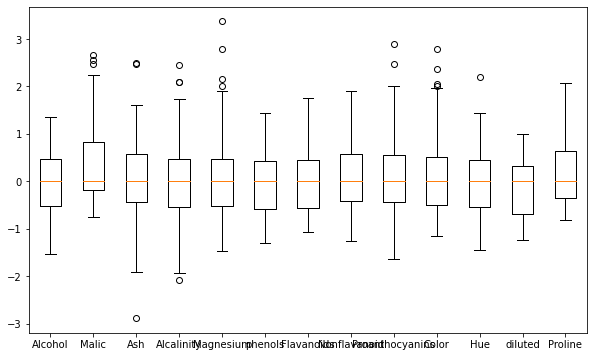

In [51]:
fig, ax = plt.subplots()
ax.boxplot(X_norm,labels=X_norm.columns)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

In [52]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, Y, test_size=0.3, random_state=1) 

In [53]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf = clf.fit(Xn_train, y_train)

y_pred = clf.predict(Xn_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


In [55]:
cnf_matrix = metrics.confusion_matrix(yn_test, y_pred)
cnf_matrix

array([[22,  1,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

no mejora el modelo 

## MODELO 2: XGboast Classifier

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [58]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [59]:
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [61]:
xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)

In [62]:
preds = xg_reg.predict(X_test)

In [63]:
y_test = le.fit_transform(y_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.9629629629629629


In [65]:
cnf_matrix = metrics.confusion_matrix(yn_test, preds)
cnf_matrix

array([[ 0,  0,  0,  0],
       [23,  0,  0,  0],
       [ 1, 18,  0,  0],
       [ 0,  1, 11,  0]], dtype=int64)

### cambio de parametros modelo 2 

In [66]:
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 5, alpha = 10, n_estimators = 15, tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False)

In [67]:
xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)

In [68]:
preds = xg_reg.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.9814814814814815


In [70]:
cnf_matrix = metrics.confusion_matrix(yn_test, preds)
cnf_matrix

array([[ 0,  0,  0,  0],
       [23,  0,  0,  0],
       [ 1, 18,  0,  0],
       [ 0,  0, 12,  0]], dtype=int64)

Con estos parametros mejora el modelo 

### Cross Validation

In [75]:
k_folds = KFold(n_splits = 10)
Yt = le.fit_transform(Y)

scores = cross_val_score(xg_reg, X, Yt, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [1.         0.72222222 0.94444444 0.88888889 0.94444444 1.
 1.         0.66666667 0.88235294 1.        ]
Average CV Score:  0.9049019607843137
Number of CV Scores used in Average:  10


El indicador disminuye con la CV

### datos transformados

In [76]:
xg_reg.fit(Xn_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)

In [77]:
preds = xg_reg.predict(Xn_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.9814814814814815


añadiendo los datos transformados no mejora pero 0.98 ya es bastante alto

### Cross Validation con datos transformados

In [80]:
k_folds = KFold(n_splits = 10)
Yt = le.fit_transform(Y)

scores = cross_val_score(xg_reg, X_norm, Yt, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [1.         0.72222222 0.94444444 0.88888889 0.94444444 1.
 1.         0.66666667 0.88235294 1.        ]
Average CV Score:  0.9049019607843137
Number of CV Scores used in Average:  10


tampoco mejora

## Modelo 3: Logistic regression

In [96]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(random_state=16,solver="lbfgs", max_iter=100)

In [86]:
logreg.fit(X_train, y_train)

C:\Users\verom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [87]:
y_pred2 = logreg.predict(X_test)

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9629629629629629


 Confusion Matrix

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[22,  1,  0],
       [ 0, 19,  0],
       [ 0,  1, 11]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

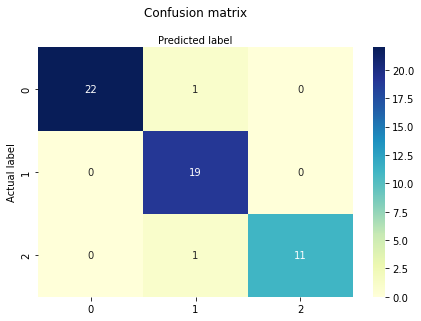

In [94]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
target_names = ["Class 1","Class 2","Class 3"]
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       1.00      0.96      0.98        23
     Class 2       0.90      1.00      0.95        19
     Class 3       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



## cambio de parametros

In [100]:
logreg = LogisticRegression(random_state=1,solver="liblinear", max_iter=150)
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)

In [102]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9629629629629629


In [103]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[22,  1,  0],
       [ 0, 19,  0],
       [ 0,  1, 11]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

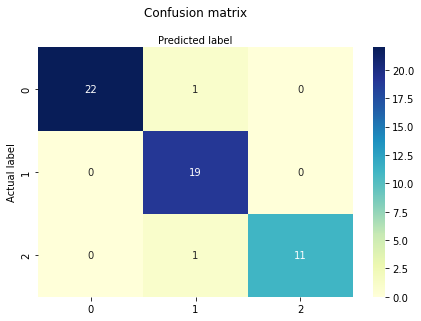

In [104]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

yo creo q ahora es dificil mejorar el modelo porque tenemos indicadores bastante elevados 

## Cross Validation

In [106]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(logreg, X_norm, Yt, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [1.         0.94444444 1.         0.88888889 0.94444444 1.
 1.         0.94444444 1.         1.        ]
Average CV Score:  0.9722222222222221
Number of CV Scores used in Average:  10


yo creo que el mejor modelo es el de regresión logistica puesto que el indicador obtenido en la Cross Validation es el mas alto. Los valores de la matriz de confusion tambien son adecuados por lo que yo creo que emplearía el modelo 3